In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [4]:
data["Day"] = data["Timestamp"].dt.date
day_average = data.groupby(["Day"]).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


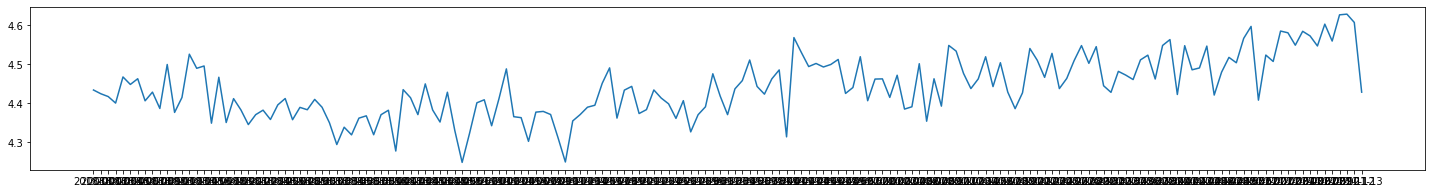

In [5]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")
week_average = data.groupby(["Week"]).mean()

plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average["Rating"])

<AxesSubplot:xlabel='Month'>

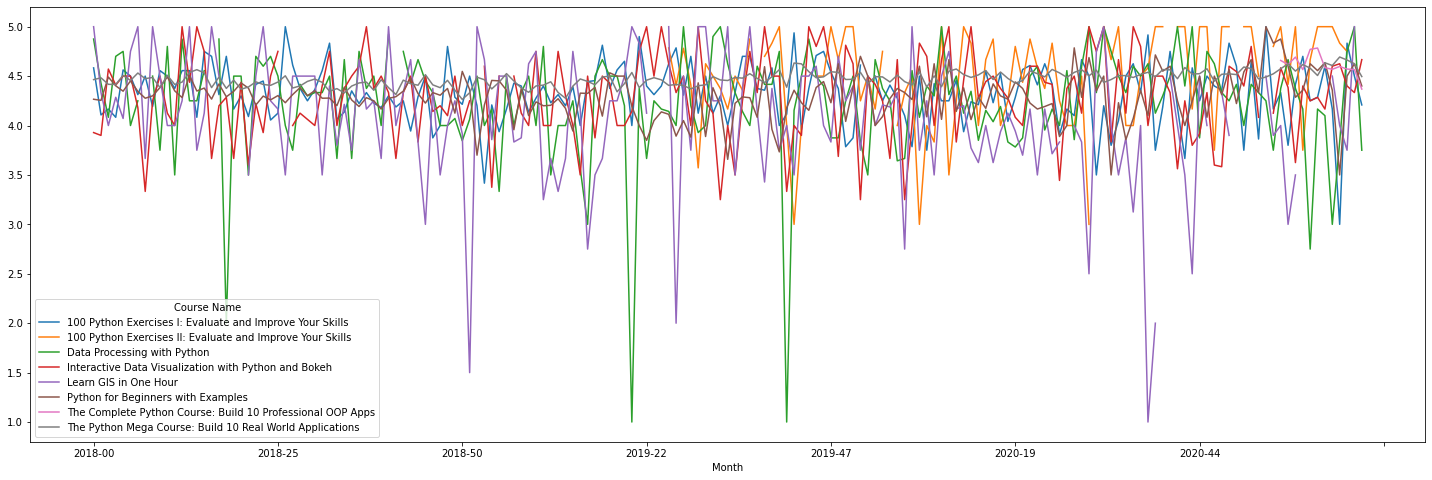

In [3]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%U")
month_average_crs = data.groupby(["Month", "Course Name"])["Rating"].mean().unstack()

month_average_crs.plot(figsize=(25,8))